<a href="https://colab.research.google.com/github/AMSUCF/DHProgramming/blob/main/BlueSky_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.24.3
!pip install atproto==0.0.61 --no-deps # Install without reinstalling dependencies
!pip install nltk==3.8.1 --no-deps # Install without reinstalling dependencies
!pip install pandas==1.5.3 --no-deps # Install without reinstalling dependencies
!pip install matplotlib==3.7.1 --no-deps # Install without reinstalling dependencies
!pip install seaborn==0.12.2 --no-deps # Install without reinstalling dependencies

from IPython import get_ipython
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 30.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.3 which is

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 362, in run
    resolver = self.make_resolver(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 177, in make_resolver
    return pip._internal.resolution.resolvelib.resolver.Resolver(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 58, in __init__
    self.factory = Factory(
                   ^^^^^^^^
  File "/usr/local/lib/py

In [ ]:
from atproto import Client
import datetime
from google.colab import userdata

# Replace with your Bluesky username and password
BLUESKY_USERNAME = userdata.get('Username')
BLUESKY_PASSWORD = userdata.get('Password')

client = Client()
client.login(BLUESKY_USERNAME, BLUESKY_PASSWORD)

ProfileViewDetailed(did='did:plc:4ji772lj3mrupzidh47uh4za', handle='lucidbard.bsky.social', associated=ProfileAssociated(chat=None, feedgens=0, labeler=False, lists=0, starter_packs=0, py_type='app.bsky.actor.defs#profileAssociated'), avatar='https://cdn.bsky.app/img/avatar/plain/did:plc:4ji772lj3mrupzidh47uh4za/bafkreidapxihe3tq3fvle7mcufsr6wd5huedtb6ebnlmtdz7u6vuv7b4wi@jpeg', banner=None, created_at='2023-08-18T17:37:32.415Z', description='He/him. Assoc. Professor of Games and Digital Media, UCF. Co-PI NSF Virtual Experience Research Accelerator. VR, AI, Interactive Narratives, Authoring Platforms. Co-author of Flash: Building the Interactive Web, Adventure Games: Playing the Outsider', display_name='John T. Murray', followers_count=504, follows_count=235, indexed_at='2024-11-16T14:05:05.518Z', joined_via_starter_pack=None, labels=[], pinned_post=None, posts_count=17, verification=None, viewer=ViewerState(blocked_by=False, blocking=None, blocking_by_list=None, followed_by=None, follo

In [ ]:
def fetch_public_posts(client, query, limit=100):
    """Fetches public posts containing a query."""
    all_posts = []
    cursor = None

    while len(all_posts) < limit:
        # Create the params dictionary
        params = {
            'q': query,
            'limit': min(100, limit - len(all_posts)),  # Adjust limit
        }
        if cursor:
            params['cursor'] = cursor # Add cursor if available

        response = client.app.bsky.feed.search_posts(params)

        if not response.posts:
            break  # No more posts found

        for post in response.posts:
            all_posts.append({
                'text': post.record.text,
                'date': datetime.datetime.fromisoformat(post.record.created_at.replace('Z', '+00:00'))
            })

        cursor = response.cursor
        if not cursor:
            break  # No more pages

    return all_posts

# You can adjust the limit to fetch more posts
query = "AI"
posts = fetch_public_posts(client, query, limit=1000)

print(f"Found {len(posts)} public posts containing '{query}'.")

Found 1000 public posts containing 'AI'.


In [ ]:
import json
import datetime

# Assuming 'posts' is the list of dictionaries containing the fetched posts

def save_posts_to_json(posts_list, filename="bluesky_posts.json"):
    """Saves a list of posts to a JSON file."""
    # Convert datetime objects to string format for JSON serialization
    serializable_posts = []
    for post in posts_list:
        serializable_post = post.copy() # Create a copy to avoid modifying the original list
        if isinstance(serializable_post.get('date'), datetime.datetime):
            serializable_post['date'] = serializable_post['date'].isoformat()
        serializable_posts.append(serializable_post)

    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(serializable_posts, f, indent=4) # Use indent for readability

# Call the function to save the posts
save_posts_to_json(posts, filename="ai_bluesky_posts.json")

print(f"Saved {len(posts)} posts to ai_bluesky_posts.json")

Saved 1000 posts to ai_bluesky_posts.json


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except Exception: # Catch a more general exception
    nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(posts_list):
    """Analyzes the sentiment of a list of posts."""
    sentiments = []
    for post in posts_list:
        sentiment_scores = sia.polarity_scores(post['text'])
        sentiments.append({
            'text': post['text'],
            'date': post['date'],
            'compound_sentiment': sentiment_scores['compound']
        })
    return sentiments

post_sentiments = analyze_sentiment(posts)

# Convert to DataFrame for easier analysis
df = pd.DataFrame(post_sentiments)


Sentiment Distribution:
count    1000.000000
mean        0.082236
std         0.409272
min        -0.965200
25%         0.000000
50%         0.000000
75%         0.361550
max         0.962000
Name: compound_sentiment, dtype: float64

Sentiment Categories Count:
Neutral     442
Positive    343
Negative    215
Name: sentiment_category, dtype: int64


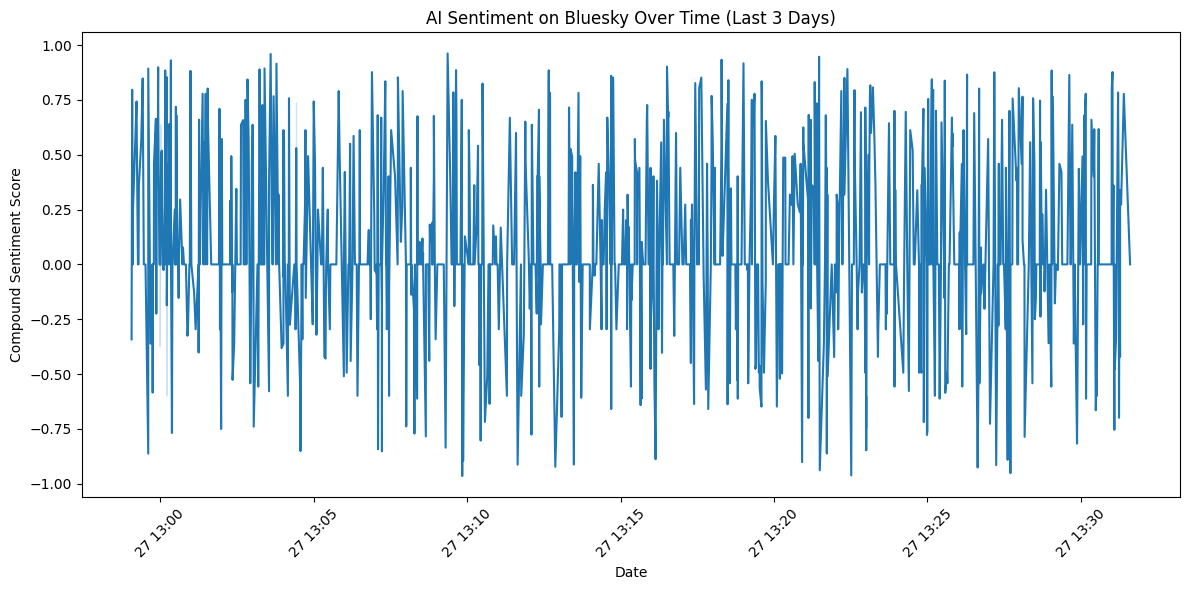

In [ ]:
# Basic sentiment distribution
print("\nSentiment Distribution:")
print(df['compound_sentiment'].describe())

# You can categorize sentiment based on compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['compound_sentiment'].apply(categorize_sentiment)

print("\nSentiment Categories Count:")
print(df['sentiment_category'].value_counts())

# Visualize sentiment over time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='compound_sentiment')
plt.title('AI Sentiment on Bluesky Over Time (Last 3 Days)')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# You can also explore word frequencies, topics, etc., but those require more advanced NLP techniques.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Download necessary NLTK data if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except Exception:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
# Initialize PorterStemmer directly
ps = PorterStemmer()

def preprocess_text(text):
    """Preprocesses text for topic modeling."""
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()]) # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words] # Remove stop words
    words = [ps.stem(word) for word in words] # Stemming
    return ' '.join(words)

# Apply preprocessing to the post text
df['processed_text'] = df['text'].apply(preprocess_text)

In [ ]:
# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000) # Limit features for manageability
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

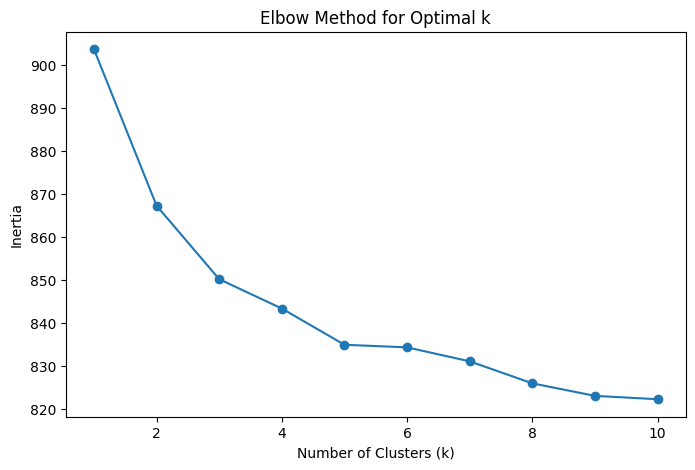

In [ ]:
# Determine the optimal number of clusters (using Elbow Method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, choose a suitable number of clusters (e.g., k=3)
num_clusters = 3 # You can adjust this based on the Elbow Method plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10) # Set n_init explicitly
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

In [ ]:
# Get the terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

print("\nTop terms per cluster:")
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]: # Print top 10 terms per cluster
        print(f" - {terms[ind]}")
    print("-" * 20)

# You can also view posts within each cluster to get a better sense of the topic
for cluster_id in range(num_clusters):
    print(f"\nSample posts from Cluster {cluster_id}:")
    cluster_posts = df[df['cluster'] == cluster_id]['text'].sample(min(5, len(df[df['cluster'] == cluster_id]))) # Sample up to 5 posts
    for post_text in cluster_posts:
        print(f"- {post_text[:100]}...") # Print a snippet of the post text
    print("-" * 20)


Top terms per cluster:
Cluster 0:
 - aiイラスト
 - aiart
 - おやすみなさい
 - stablediffus
 - novelai
 - sdxl
 - ai画像
 - aigirl
 - form
 - desir
--------------------
Cluster 1:
 - de
 - que
 - aí
 - eu
 - não
 - um
 - pra
 - uma
 - se
 - com
--------------------
Cluster 2:
 - ai
 - use
 - like
 - gener
 - get
 - make
 - new
 - ai摘要
 - work
 - go
--------------------

Sample posts from Cluster 0:
- #このタグを見た人は花と女性の画像を貼る
#aiart
#AIイラスト
#白水着
#ワンピース水着...
- #AIイラスト #AIart
#英雄伝説 #ガガーブトリロジー #白き魔女 #フィリー
何故自称台湾在住の台湾の方が、日本語で必死に大量ポストしているのですかね？
ステマですかね？
日台友好を破壊する...
- #このタグを見た人は花と女性の画像を貼る
#AIイラスト...
- メガネの佃煮さんのプールプロンプトを背景に生成してみました🏊
AI画像生成モデルは、Ideogram 3.0です😊
#AIArt #AIイラスト...
- 今日もお疲れ様です！
また明日も頑張って行ってらっしゃいなのだ！
それではおやすみなのだ*˙︶˙*)ﾉ"
#AIイラスト #着替え中...
--------------------

Sample posts from Cluster 1:
- minha filha num se mata naum .. que eu te achei mó delícia. vô te pegar gostosin. tu num qué não? aí...
- desses ai eu ja sou dois, quase q eu gabarito🙏🏻🙏🏻...
- tava falando do anime de golden kamuy com uma amiga 

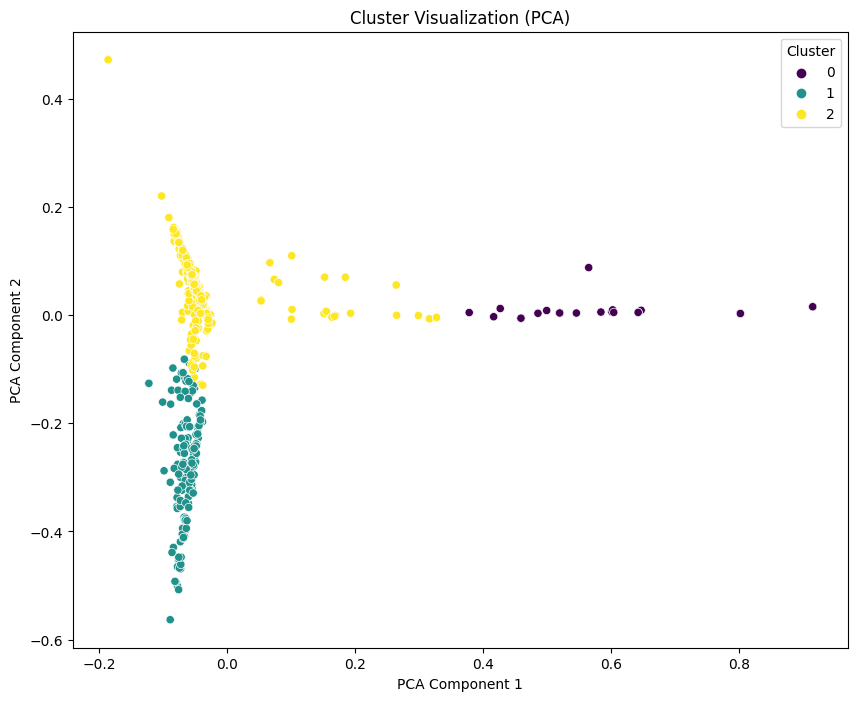

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization (e.g., using PCA)
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_matrix.toarray()) # Convert sparse matrix to dense array

df['pca_x'] = pca_result[:, 0]
df['pca_y'] = pca_result[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='pca_x', y='pca_y', hue='cluster', palette='viridis')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Install fasttext if you haven't already
!pip install fasttext==0.9.2

import fasttext

# Download the pre-trained language identification model
# This is a large file, so it might take some time
try:
    lid_model = fasttext.load_model('lid.176.bin')
except ValueError: # Handle case where model is not found locally
    print("Downloading fasttext language identification model...")
    import urllib.request
    url = 'https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin'
    urllib.request.urlretrieve(url, 'lid.176.bin')
    lid_model = fasttext.load_model('lid.176.bin')


def identify_language(text):
    """Identifies the language of a given text."""
    try:
        # fasttext returns a list of tuples, e.g., [('__label__en', 0.9)]
        result = lid_model.predict(text)
        language_label = result[0][0]
        # Extract the language code (e.g., 'en' from '__label__en')
        language_code = language_label.replace('__label__', '')
        return language_code
    except Exception as e:
        print(f"Error identifying language for text: {text[:50]}... - {e}")
        return None

# Apply language identification to your DataFrame
df['language'] = df['text'].apply(identify_language)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp311-cp311-linux_x86_64.whl size=4304102 sha256=5077c5c1a4da345868c05f580357b07c16998f3b7b2dab3ace15b274152d3e8e
  Stored in directory: /root/.cache/pip/wheels/12/89/c9/c932d04c4dd65abe347bbb3e6f7668688753cbc585305ad8b7
Successfully built fasttext


Error identifying language for text: みなさんおやすみなさい

#AIイラスト... - predict processes one line at a time (remove '\n')
Error identifying language for text: Having had #Microsoft 365 #Copilot deployed at wor... - predict processes one line at a time (remove '\n')
Error identifying language for text: 🧠 Why is it important to treat humans with more re... - predict processes one line at a time (remove '\n')
Error identifying language for text: 📍https://www.amrita.edu/
📍https://ammachilabs.org/... - predict processes one line at a time (remove '\n')
Error identifying language for text: Human lyrics. AI music. Pure gaming energy. ⚡🎮
Joi... - predict processes one line at a time (remove '\n')
Error identifying language for text: ⚡️ AI Brings New Tools to the Real World

🏷️ #devd... - predict processes one line at a time (remove '\n')
Error identifying language for text: 久々に作成〜
アリスリス・ナイン・ミハイル
マリーシャル・ナイン・ミハイルです〜
#aiイラスト
#... - predict processes one line at a time (remove '\n')
Error identifying lang